# Validando e gerando gráficos


In [1]:
#IMPORTANDO BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from scipy.interpolate import griddata  
import numpy.ma as ma
import folium
from folium.plugins import HeatMap
from mpltools import color
import os 
import seaborn as sns;
import math;

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6, viridis
from bokeh.plotting import figure
from bokeh.transform import factor_cmap


In [2]:
dfConsolidado = pd.read_csv("../datasets/consolidado.csv",sep=";")

dfConsolidado = dfConsolidado[dfConsolidado['ESTADO'] =='MS']
dfConsolidado = dfConsolidado[(dfConsolidado['LATITUDE'] <= -21.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['LATITUDE'] >= -23.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['LONGITUDE'] >= -55.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['CODIGO'] != 'A749')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'FATIMA DO SUL')]
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'BRASILANDIA')]
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'NOVA ANDRADINA')] 

print(pd.__version__)

1.2.4


In [3]:
dfConsolidado.isnull().sum()

Data                                           0
REGIAO                                         0
ESTADO                                         0
CODIGO                                         0
NOME                                           0
LATITUDE                                       0
LONGITUDE                                      0
ALTITUDE                                       0
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)              29
RADIACAO GLOBAL (KJ/m²)                       31
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)    31
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)    31
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)      67
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)      67
VENTO, VELOCIDADE HORARIA (m/s)               30
dtype: int64

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)              29
RADIACAO GLOBAL (KJ/m²)                       31
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)    31
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)    31
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)      67
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)      67
VENTO, VELOCIDADE HORARIA (m/s)               30
dtype: int64


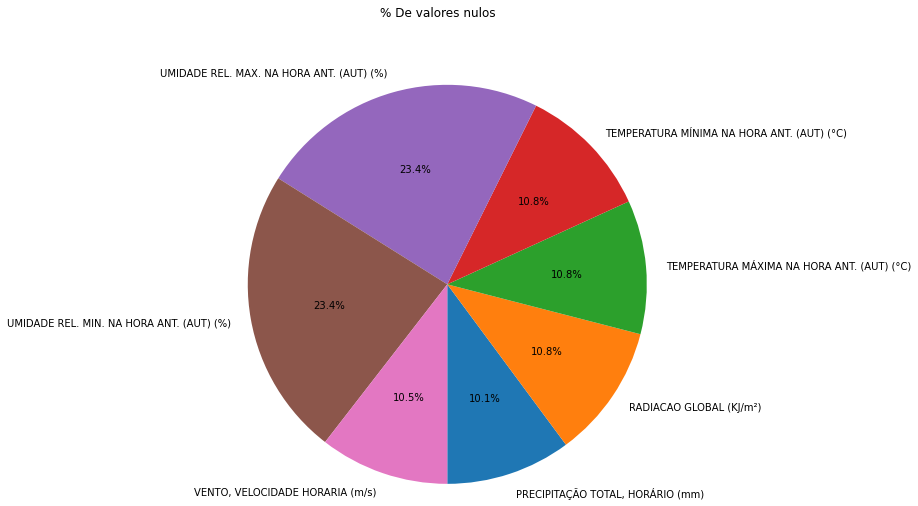

In [4]:
dados = dfConsolidado.isnull().sum(); 
print(dados[8:])
explode = ( 0, 0, 0, 0,0 , 0, 0)
#colrs=['cyan', 'tan', 'wheat','green','blue' ]
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(dados[8:], explode=explode, labels=dados.index[8:], autopct='%1.1f%%',startangle=270)
ax.axis('equal') # mantenha um circulo
fig.suptitle("% De valores nulos");
#fig.savefig('data/pizza.png', dpi=125)
 


In [5]:
from bokeh.palettes import magma, Category20                  # paleta de cores

dados = dfConsolidado.isnull().sum(); 
    
# cria a data
x_data = ['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)','RADIACAO GLOBAL (KJ/m²)','TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)','TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)','VENTO, VELOCIDADE HORARIA (m/s)']
y_data = [dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], dados['RADIACAO GLOBAL (KJ/m²)'], dados['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'],dados['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'], dados['VENTO, VELOCIDADE HORARIA (m/s)']]

data = ColumnDataSource(data=dict(x_data=x_data, y_data=y_data))  

p = figure(x_range=x_data,
           #plot_width=600,
           plot_height=450, 
           #toolbar_location=None, 
           title="% De valores nulos"
          )  # cria figura
p.vbar(x='x_data', 
       top='y_data', 
       width=0.9, 
       source=data, 
       legend_field="x_data",
       line_color='white',
       #fill_color=factor_cmap('x_data', palette=viridis(10), factors=x_data)  # cores
       #fill_color=factor_cmap('x_data', palette=magma(10), factors=x_data)
       #fill_color=factor_cmap('x_data', palette=Spectral6[10], factors=x_data)   # 6 cores
       fill_color=factor_cmap('x_data', palette=Category20[20], factors=x_data)
      )
#
#p.xaxis.major_label_orientation = "vertical"  # legend orientation
#p.legend.orientation = "horizontal"
p.xaxis.major_label_orientation = np.math.pi/4   # legend orientation by angle pi/x
#p.legend.location = "top_center"
show(p)

In [6]:
from bokeh.palettes import magma, Category20                  # paleta de cores
 
dfPrecipitacao = dfConsolidado

dfPrecipitacao = dfPrecipitacao[(dfConsolidado['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] > 0)] 
 
#dfConsolidado = dfConsolidado[not dfConsolidado['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].isna()]
    
nd = pd.DataFrame(dfPrecipitacao, columns=['NOME', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']).groupby(['NOME'])['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum().reset_index()

 
# cria a data
x_data = nd['NOME']
y_data = nd['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']
 
data = ColumnDataSource(data=dict(x_data=x_data, y_data=y_data))  

p = figure(x_range=x_data,
           #plot_width=600,
           plot_height=450, 
           #toolbar_location=None, 
           title="Precipitação Total, 2020 (mm)"
          )  # cria figura
p.vbar(x='x_data', 
       top='y_data', 
       width=0.9, 
       source=data, 
       #legend_field="x_data",
       line_color='white',
       #fill_color=factor_cmap('x_data', palette=viridis(10), factors=x_data)  # cores
       #fill_color=factor_cmap('x_data', palette=magma(10), factors=x_data)
       #fill_color=factor_cmap('x_data', palette=Spectral6[10], factors=x_data)   # 6 cores
       fill_color=factor_cmap('x_data', palette=Category20[20], factors=x_data)
      )
#
#p.xaxis.major_label_orientation = "vertical"  # legend orientation
#p.legend.orientation = "horizontal"
p.xaxis.major_label_orientation = np.math.pi/4   # legend orientation by angle pi/x
#p.legend.location = "top_center"
show(p)

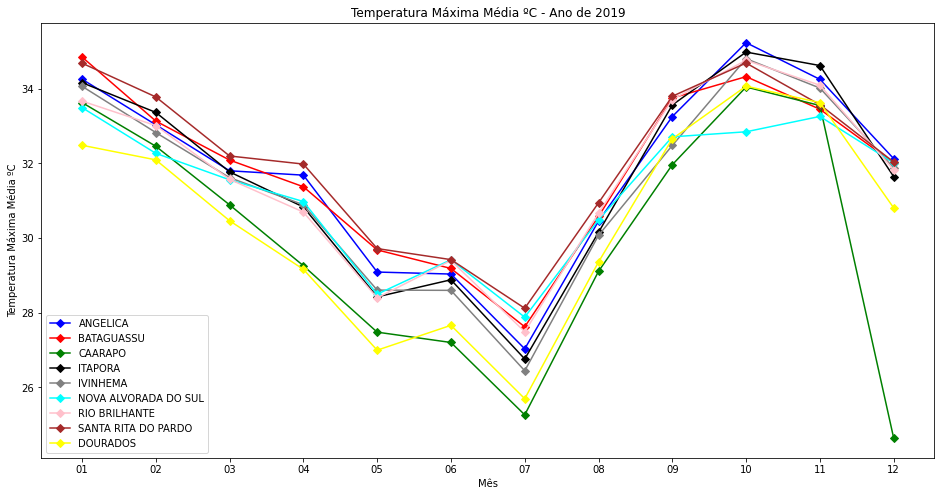

In [7]:
from bokeh.palettes import magma, Category20                  # paleta de cores
 
dfTemperatura = dfConsolidado

dfTemperatura = dfTemperatura.dropna( subset=['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'])
dfTemperatura = dfTemperatura[ dfTemperatura['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'].notna()]
dfTemperatura.loc[dfTemperatura['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].isnull(), 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = 0;
dfTemperatura.loc[dfTemperatura['VENTO, VELOCIDADE HORARIA (m/s)'].isnull(), 'VENTO, VELOCIDADE HORARIA (m/s)'] = 0;
dfTemperatura.loc[dfTemperatura['RADIACAO GLOBAL (KJ/m²)'].isnull(), 'RADIACAO GLOBAL (KJ/m²)'] = 0;
dfTemperatura.loc[dfTemperatura['VENTO, VELOCIDADE HORARIA (m/s)'].isnull(), 'VENTO, VELOCIDADE HORARIA (m/s)'] = 0;
dfTemperatura.loc[dfTemperatura['UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'].isnull(), 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'] = 100;
dfTemperatura.loc[dfTemperatura['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'].isnull(), 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'] = 50;


#dfnulos = dfTemperatura.dropna( subset=['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'])



dfTemperatura['MES'] =  dfTemperatura['Data'].apply(lambda x: str(x)[5:7])

 
nd = pd.DataFrame(dfTemperatura, columns=['NOME','MES', 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']).groupby(['NOME','MES'])['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'].mean().reset_index()

nd2 = pd.DataFrame(dfTemperatura, columns=['NOME','TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']).groupby(['NOME'])['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'].mean().reset_index()
 

########################################################################
dfANGELICA =   nd[nd['NOME'] =='ANGELICA']
tmp1 = dfANGELICA['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']

dfMES = dfANGELICA['MES'] 

dfBATAGUASSU =  nd[nd['NOME'] =='BATAGUASSU']
tmp2 = dfBATAGUASSU['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']

dfCAARAPO =  nd[nd['NOME'] =='CAARAPO']
tmp3 = dfCAARAPO['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']

dfBRASILANDIA =  nd[nd['NOME'] =='BRASILANDIA']
tmp4 = dfBRASILANDIA['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']

dfITAPORA =  nd[nd['NOME'] =='ITAPORA']
tmp5 = dfITAPORA['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']

dfIVINHEMA =  nd[nd['NOME'] =='IVINHEMA']
tmp6 = dfIVINHEMA['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']

dfALVORADA =  nd[nd['NOME'] =='NOVA ALVORADA DO SUL']
tmp7 = dfALVORADA['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']

dfANDRADINA =  nd[nd['NOME'] =='NOVA ANDRADINA']
tmp8 = dfANDRADINA['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']

dfBRILHANTE =  nd[nd['NOME'] =='RIO BRILHANTE']
tmp9 = dfBRILHANTE['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']

dfPARDO =  nd[nd['NOME'] =='SANTA RITA DO PARDO']
tmp10 = dfPARDO['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']

dfDOURADOS =  nd[nd['NOME'] =='DOURADOS']
tmp11 = dfDOURADOS['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'] 

# exemplo - grafico
x = dfMES
y1 = tmp1
y2 = tmp2
y3 = tmp3
y4 = tmp4
y5 = tmp5
y6 = tmp6
y7 = tmp7
y8 = tmp8
y9 = tmp9
y10= tmp10
y11= tmp11
#
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(x, y1, color="blue", label="ANGELICA",marker='D')
ax.plot(x, y2, color="red",  label="BATAGUASSU",marker='D')
ax.plot(x, y3, color="green",label="CAARAPO",marker='D')
#ax.plot(x, y4, color="yellow", label="BRASILANDIA")
ax.plot(x, y5, color="black",  label="ITAPORA",marker='D')
ax.plot(x, y6, color="gray",label="IVINHEMA",marker='D')
ax.plot(x, y7, color="cyan", label="NOVA ALVORADA DO SUL",marker='D')
#ax.plot(x, y8, color="cian",  label="NOVA ANDRADINA")
ax.plot(x, y9, color="pink",label="RIO BRILHANTE",marker='D')
ax.plot(x, y10, color="brown",label="SANTA RITA DO PARDO",marker='D')
ax.plot(x, y11, color="yellow",label="DOURADOS",marker='D')
ax.set_xlabel("Mês")
ax.set_ylabel("Temperatura Máxima Média ºC")
ax.set_title('Temperatura Máxima Média ºC - Ano de 2019')
ax.legend();


 


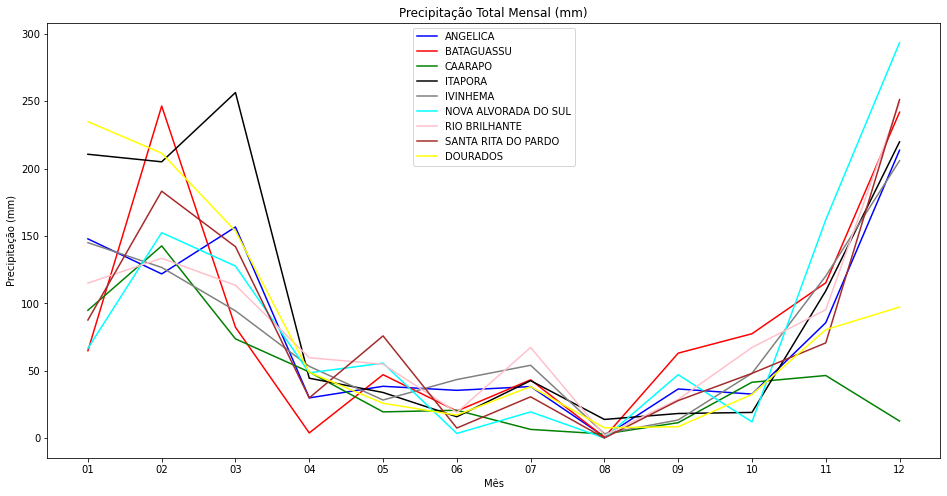

In [8]:
# Precipitação em gráfico de linha não ficou bom.
# Não usar
from bokeh.palettes import magma, Category20                  # paleta de cores
dfConsolidado = pd.read_csv("../datasets/consolidado.csv",";");  

dfConsolidado = dfConsolidado[dfConsolidado['ESTADO'] =='MS']
dfConsolidado = dfConsolidado[(dfConsolidado['LATITUDE'] <= -21.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['LATITUDE'] >= -23.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['LONGITUDE'] >= -55.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['CODIGO'] != 'A749')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'FATIMA DO SUL')] 
#dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'DOURADOS')] 
#dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'BATAGUASSU')] 
#dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'CAARAPO')] 


dfConsolidado = dfConsolidado.dropna( subset=['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'])
dfConsolidado = dfConsolidado[ dfConsolidado['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'].notna()]


dfConsolidado.loc[dfConsolidado['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].isnull(), 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = 0;
dfConsolidado.loc[dfConsolidado['VENTO, VELOCIDADE HORARIA (m/s)'].isnull(), 'VENTO, VELOCIDADE HORARIA (m/s)'] = 0;
dfConsolidado.loc[dfConsolidado['RADIACAO GLOBAL (KJ/m²)'].isnull(), 'RADIACAO GLOBAL (KJ/m²)'] = 0;
dfConsolidado.loc[dfConsolidado['VENTO, VELOCIDADE HORARIA (m/s)'].isnull(), 'VENTO, VELOCIDADE HORARIA (m/s)'] = 0;
dfConsolidado.loc[dfConsolidado['UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'].isnull(), 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'] = 100;
dfConsolidado.loc[dfConsolidado['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'].isnull(), 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'] = 50;


#dfnulos = dfConsolidado.dropna( subset=['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'])
#print(dfnulos.isnull().sum() ) 


dfConsolidado['MES'] =  dfConsolidado['Data'].apply(lambda x: str(x)[5:7])

 
nd = pd.DataFrame(dfConsolidado, columns=['NOME','MES', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']).groupby(['NOME','MES'])['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum().reset_index()
 
########################################################################
dfANGELICA =   nd[nd['NOME'] =='ANGELICA']
tmp1 = dfANGELICA['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfMES = dfANGELICA['MES'] 

dfBATAGUASSU =  nd[nd['NOME'] =='BATAGUASSU']
tmp2 = dfBATAGUASSU['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfCAARAPO =  nd[nd['NOME'] =='CAARAPO']
tmp3 = dfCAARAPO['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfFATIMA =  nd[nd['NOME'] =='FATIMA DO SUL']
tmp4 = dfFATIMA['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfITAPORA =  nd[nd['NOME'] =='ITAPORA']
tmp5 = dfITAPORA['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfIVINHEMA =  nd[nd['NOME'] =='IVINHEMA']
tmp6 = dfIVINHEMA['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfALVORADA =  nd[nd['NOME'] =='NOVA ALVORADA DO SUL']
tmp7 = dfALVORADA['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfANDRADINA =  nd[nd['NOME'] =='NOVA ANDRADINA']
tmp8 = dfANDRADINA['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfBRILHANTE =  nd[nd['NOME'] =='RIO BRILHANTE']
tmp9 = dfBRILHANTE['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfPARDO =  nd[nd['NOME'] =='SANTA RITA DO PARDO']
tmp10 = dfPARDO['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfDOURADOS =  nd[nd['NOME'] =='DOURADOS']
tmp11 = dfDOURADOS['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] 

# exemplo - grafico
x = dfMES
y1 = tmp1
y2 = tmp2
y3 = tmp3
y4 = tmp4
y5 = tmp5
y6 = tmp6
y7 = tmp7
y8 = tmp8
y9 = tmp9
y10= tmp10
y11= tmp11
#
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(x, y1, color="blue", label="ANGELICA")
ax.plot(x, y2, color="red",  label="BATAGUASSU")
ax.plot(x, y3, color="green",label="CAARAPO")
#ax.plot(x, y4, color="yellow", label="BRASILANDIA")
ax.plot(x, y5, color="black",  label="ITAPORA")
ax.plot(x, y6, color="gray",label="IVINHEMA")
ax.plot(x, y7, color="cyan", label="NOVA ALVORADA DO SUL")
#ax.plot(x, y8, color="cian",  label="NOVA ANDRADINA")
ax.plot(x, y9, color="pink",label="RIO BRILHANTE")
ax.plot(x, y10, color="brown",label="SANTA RITA DO PARDO")
ax.plot(x, y11, color="yellow",label="DOURADOS")
ax.set_xlabel("Mês")
ax.set_ylabel("Precipitação (mm)")
ax.set_title('Precipitação Total Mensal (mm)')
ax.legend();
 
 

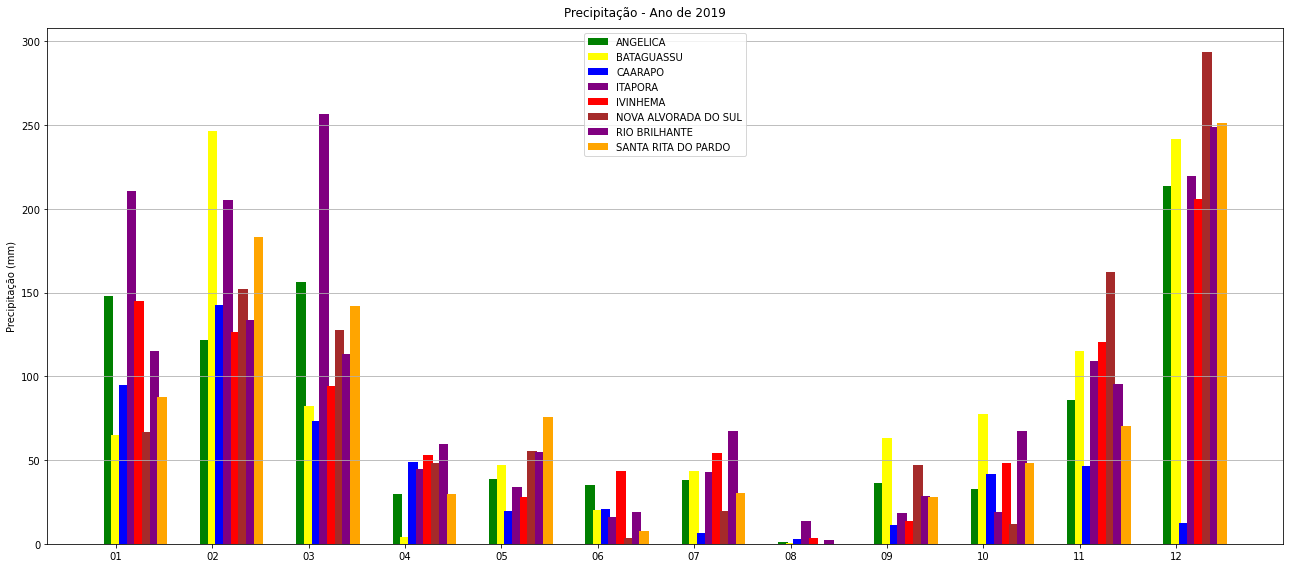

In [9]:
from bokeh.palettes import magma, Category20                  # paleta de cores
dfConsolidado = pd.read_csv("../datasets/consolidado.csv",";");  

dfConsolidado = dfConsolidado[dfConsolidado['ESTADO'] =='MS']
dfConsolidado = dfConsolidado[(dfConsolidado['LATITUDE'] <= -21.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['LATITUDE'] >= -23.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['LONGITUDE'] >= -55.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['CODIGO'] != 'A749')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'FATIMA DO SUL')] 
#dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'DOURADOS')] 
#dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'BATAGUASSU')] 
#dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'CAARAPO')] 


dfConsolidado = dfConsolidado.dropna( subset=['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'])
dfConsolidado = dfConsolidado[ dfConsolidado['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'].notna()]


dfConsolidado.loc[dfConsolidado['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].isnull(), 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = 0;
dfConsolidado.loc[dfConsolidado['VENTO, VELOCIDADE HORARIA (m/s)'].isnull(), 'VENTO, VELOCIDADE HORARIA (m/s)'] = 0;
dfConsolidado.loc[dfConsolidado['RADIACAO GLOBAL (KJ/m²)'].isnull(), 'RADIACAO GLOBAL (KJ/m²)'] = 0;
dfConsolidado.loc[dfConsolidado['VENTO, VELOCIDADE HORARIA (m/s)'].isnull(), 'VENTO, VELOCIDADE HORARIA (m/s)'] = 0;
dfConsolidado.loc[dfConsolidado['UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'].isnull(), 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'] = 100;
dfConsolidado.loc[dfConsolidado['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'].isnull(), 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'] = 50;


#dfnulos = dfConsolidado.dropna( subset=['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'])
#print(dfnulos.isnull().sum() ) 


dfConsolidado['MES'] =  dfConsolidado['Data'].apply(lambda x: str(x)[5:7])

 
nd = pd.DataFrame(dfConsolidado, columns=['NOME','MES', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']).groupby(['NOME','MES'])['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum().reset_index()

 

########################################################################
dfANGELICA =   nd[nd['NOME'] =='ANGELICA']
tmp1 = dfANGELICA['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfMES = dfANGELICA['MES'] 

dfBATAGUASSU =  nd[nd['NOME'] =='BATAGUASSU']
tmp2 = dfBATAGUASSU['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfCAARAPO =  nd[nd['NOME'] =='CAARAPO']
tmp3 = dfCAARAPO['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfFATIMA =  nd[nd['NOME'] =='FATIMA DO SUL']
tmp4 = dfFATIMA['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfITAPORA =  nd[nd['NOME'] =='ITAPORA']
tmp5 = dfITAPORA['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfIVINHEMA =  nd[nd['NOME'] =='IVINHEMA']
tmp6 = dfIVINHEMA['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfALVORADA =  nd[nd['NOME'] =='NOVA ALVORADA DO SUL']
tmp7 = dfALVORADA['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfANDRADINA =  nd[nd['NOME'] =='NOVA ANDRADINA']
tmp8 = dfANDRADINA['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfBRILHANTE =  nd[nd['NOME'] =='RIO BRILHANTE']
tmp9 = dfBRILHANTE['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfPARDO =  nd[nd['NOME'] =='SANTA RITA DO PARDO']
tmp10 = dfPARDO['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfDOURADOS =  nd[nd['NOME'] =='DOURADOS']
tmp11 = dfDOURADOS['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] 

# exemplo - grafico
x = dfMES
y1 = tmp1
y2 = tmp2
y3 = tmp3
y4 = tmp4
y5 = tmp5
y6 = tmp6
y7 = tmp7
y8 = tmp8
y9 = tmp9
y10= tmp10
y11= tmp11


# matplotlib-exemplo-40
# Histogramas de cores
barWidth = 0.08

labels  = x 
fig, ax = plt.subplots(figsize=(18, 8))
width = 0.10 # largura da barra

r1 = np.arange(len(y1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]

ax.bar(r1, y1, width, color='green', label='ANGELICA',align='center')
ax.bar(r2, y2, width, color='yellow',   label='BATAGUASSU',align='center')
ax.bar(r3, y3, width, color='blue', label='CAARAPO',align='center')
ax.bar(r4, y5, width, color='purple', label='ITAPORA',align='center')
ax.bar(r5, y6, width, color='red', label='IVINHEMA',align='center')
ax.bar(r6, y7, width, color='brown', label='NOVA ALVORADA DO SUL',align='center')
ax.bar(r7, y9, width, color='purple', label='RIO BRILHANTE',align='center')
ax.bar(r8, y10, width, color='orange', label='SANTA RITA DO PARDO',align='center')

# labels, grids, titulos e gravar a figura
ax.set_xticks(ticks=[r + barWidth for r in range(len(y1))])
ax.set_xticklabels(labels)

ax.yaxis.grid(True)
ax.legend(loc='best')
ax.set_ylabel('Precipitação (mm)')
fig.suptitle('Precipitação - Ano de 2019')
fig.tight_layout(pad=1)
#fig.savefig('data/barra.png', dpi=125)


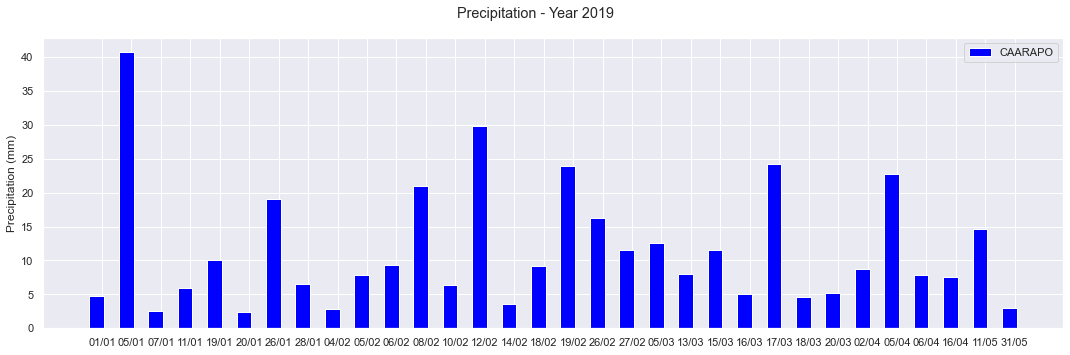

In [20]:
from bokeh.palettes import magma, Category20                  # paleta de cores
dfConsolidado = pd.read_csv("../datasets/consolidado.csv",";");  

dfConsolidado = dfConsolidado[dfConsolidado['ESTADO'] =='MS']
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] == 'CAARAPO')] 
dfConsolidado = dfConsolidado[(dfConsolidado['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] >= 2)] 
dfConsolidado = dfConsolidado[(dfConsolidado['Data'] < '2019-06-01')] 

dfConsolidado = dfConsolidado.dropna( subset=['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'])
dfConsolidado = dfConsolidado[ dfConsolidado['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'].notna()]


dfConsolidado.loc[dfConsolidado['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].isnull(), 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = 0;
dfConsolidado.loc[dfConsolidado['VENTO, VELOCIDADE HORARIA (m/s)'].isnull(), 'VENTO, VELOCIDADE HORARIA (m/s)'] = 0;
dfConsolidado.loc[dfConsolidado['RADIACAO GLOBAL (KJ/m²)'].isnull(), 'RADIACAO GLOBAL (KJ/m²)'] = 0;
dfConsolidado.loc[dfConsolidado['VENTO, VELOCIDADE HORARIA (m/s)'].isnull(), 'VENTO, VELOCIDADE HORARIA (m/s)'] = 0;
dfConsolidado.loc[dfConsolidado['UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'].isnull(), 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'] = 100;
dfConsolidado.loc[dfConsolidado['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'].isnull(), 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'] = 50;


#dfnulos = dfConsolidado.dropna( subset=['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'])
#print(dfnulos.isnull().sum() ) 


dfConsolidado['MES'] =  dfConsolidado['Data'].apply(lambda x: str(x)[5:7])
dfConsolidado['DIAMES'] =  dfConsolidado['Data'].apply(lambda x: str(x)[8:10])+'/'+dfConsolidado['Data'].apply(lambda x: str(x)[5:7])

 
#nd = pd.DataFrame(dfConsolidado, columns=['NOME','MES', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']).groupby(['NOME','MES'])['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum().reset_index()
nd = pd.DataFrame(dfConsolidado, columns=['NOME','DIAMES', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']).reset_index()

 

########################################################################
dfCAARAPO =   nd[nd['NOME'] =='CAARAPO']
tmp1 = dfCAARAPO['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

dfMES = dfCAARAPO['DIAMES'] 
 
# exemplo - grafico
x = dfMES
y1 = tmp1
 



# matplotlib-exemplo-40
# Histogramas de cores
barWidth = 0.18

labels  = x 
fig, ax = plt.subplots(figsize=(15, 5))
width = 0.50 # largura da barra

r1 = np.arange(len(y1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]

ax.bar(r1, y1, width, color='blue', label='CAARAPO',align='center')


# labels, grids, titulos e gravar a figura
ax.set_xticks(ticks=[r + barWidth for r in range(len(y1))])
ax.set_xticklabels(labels)

ax.yaxis.grid(True)
ax.legend(loc='best')
ax.set_ylabel('Precipitation (mm)')
fig.suptitle('Precipitation - Year 2019')
fig.tight_layout(pad=1)
#fig.savefig('data/barra.png', dpi=125)


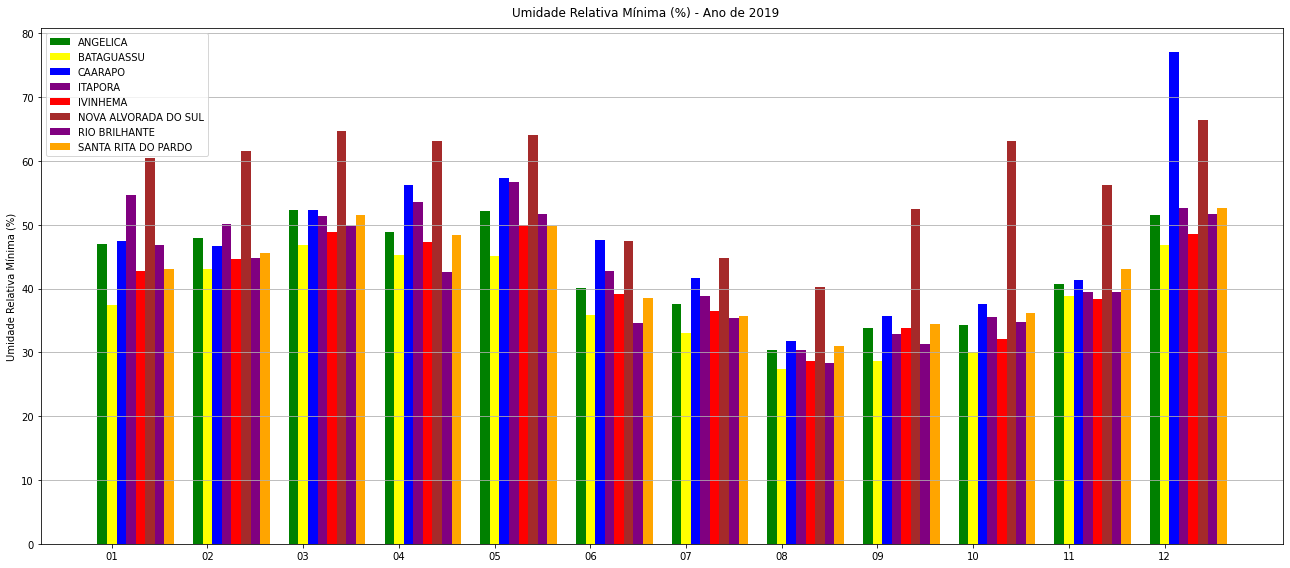

In [11]:
from bokeh.palettes import magma, Category20                  # paleta de cores
dfConsolidado = pd.read_csv("../datasets/consolidado.csv",";");  

dfConsolidado = dfConsolidado[dfConsolidado['ESTADO'] =='MS']
dfConsolidado = dfConsolidado[(dfConsolidado['LATITUDE'] <= -21.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['LATITUDE'] >= -23.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['LONGITUDE'] >= -55.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['CODIGO'] != 'A749')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'FATIMA DO SUL')] 
#dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'DOURADOS')] 
#dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'BATAGUASSU')] 
#dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'CAARAPO')] 


dfConsolidado = dfConsolidado.dropna( subset=['UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'])
dfConsolidado = dfConsolidado[ dfConsolidado['UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'].notna()]


dfConsolidado.loc[dfConsolidado['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].isnull(), 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = 0;
dfConsolidado.loc[dfConsolidado['VENTO, VELOCIDADE HORARIA (m/s)'].isnull(), 'VENTO, VELOCIDADE HORARIA (m/s)'] = 0;
dfConsolidado.loc[dfConsolidado['RADIACAO GLOBAL (KJ/m²)'].isnull(), 'RADIACAO GLOBAL (KJ/m²)'] = 0;
dfConsolidado.loc[dfConsolidado['VENTO, VELOCIDADE HORARIA (m/s)'].isnull(), 'VENTO, VELOCIDADE HORARIA (m/s)'] = 0;
dfConsolidado.loc[dfConsolidado['UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'].isnull(), 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'] = 100;
dfConsolidado.loc[dfConsolidado['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'].isnull(), 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'] = 50;


#dfnulos = dfConsolidado.dropna( subset=['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'])
#print(dfnulos.isnull().sum() ) 


dfConsolidado['MES'] =  dfConsolidado['Data'].apply(lambda x: str(x)[5:7])

 
nd = pd.DataFrame(dfConsolidado, columns=['NOME','MES', 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)']).groupby(['NOME','MES'])['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'].mean().reset_index()

 

########################################################################
dfANGELICA =   nd[nd['NOME'] =='ANGELICA']
tmp1 = dfANGELICA['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)']

dfMES = dfANGELICA['MES'] 

dfBATAGUASSU =  nd[nd['NOME'] =='BATAGUASSU']
tmp2 = dfBATAGUASSU['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)']

dfCAARAPO =  nd[nd['NOME'] =='CAARAPO']
tmp3 = dfCAARAPO['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)']

dfFATIMA =  nd[nd['NOME'] =='FATIMA DO SUL']
tmp4 = dfFATIMA['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)']

dfITAPORA =  nd[nd['NOME'] =='ITAPORA']
tmp5 = dfITAPORA['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)']

dfIVINHEMA =  nd[nd['NOME'] =='IVINHEMA']
tmp6 = dfIVINHEMA['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)']

dfALVORADA =  nd[nd['NOME'] =='NOVA ALVORADA DO SUL']
tmp7 = dfALVORADA['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)']

dfANDRADINA =  nd[nd['NOME'] =='NOVA ANDRADINA']
tmp8 = dfANDRADINA['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)']

dfBRILHANTE =  nd[nd['NOME'] =='RIO BRILHANTE']
tmp9 = dfBRILHANTE['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)']

dfPARDO =  nd[nd['NOME'] =='SANTA RITA DO PARDO']
tmp10 = dfPARDO['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)']

dfDOURADOS =  nd[nd['NOME'] =='DOURADOS']
tmp11 = dfDOURADOS['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'] 

# exemplo - grafico
x = dfMES
y1 = tmp1
y2 = tmp2
y3 = tmp3
y4 = tmp4
y5 = tmp5
y6 = tmp6
y7 = tmp7
y8 = tmp8
y9 = tmp9
y10= tmp10
y11= tmp11


# matplotlib-exemplo-40
# Histogramas de cores
barWidth = 0.10

labels  = x 
fig, ax = plt.subplots(figsize=(18, 8))
width = 0.10 # largura da barra

r1 = np.arange(len(y1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]

ax.bar(r1, y1, width, color='green', label='ANGELICA',align='center')
ax.bar(r2, y2, width, color='yellow',   label='BATAGUASSU',align='center')
ax.bar(r3, y3, width, color='blue', label='CAARAPO',align='center')
ax.bar(r4, y5, width, color='purple', label='ITAPORA',align='center')
ax.bar(r5, y6, width, color='red', label='IVINHEMA',align='center')
ax.bar(r6, y7, width, color='brown', label='NOVA ALVORADA DO SUL',)
ax.bar(r7, y9, width, color='purple', label='RIO BRILHANTE',align='center')
ax.bar(r8, y10, width, color='orange', label='SANTA RITA DO PARDO',align='center')

# labels, grids, titulos e gravar a figura
ax.set_xticks(ticks=[r + barWidth for r in range(len(y1))])
ax.set_xticklabels(labels)

ax.yaxis.grid(True)
ax.legend(loc='best')
ax.set_ylabel('Umidade Relativa Mínima (%)')
fig.suptitle('Umidade Relativa Mínima (%) - Ano de 2019')
fig.tight_layout(pad=1)
#fig.savefig('data/barra.png', dpi=125)


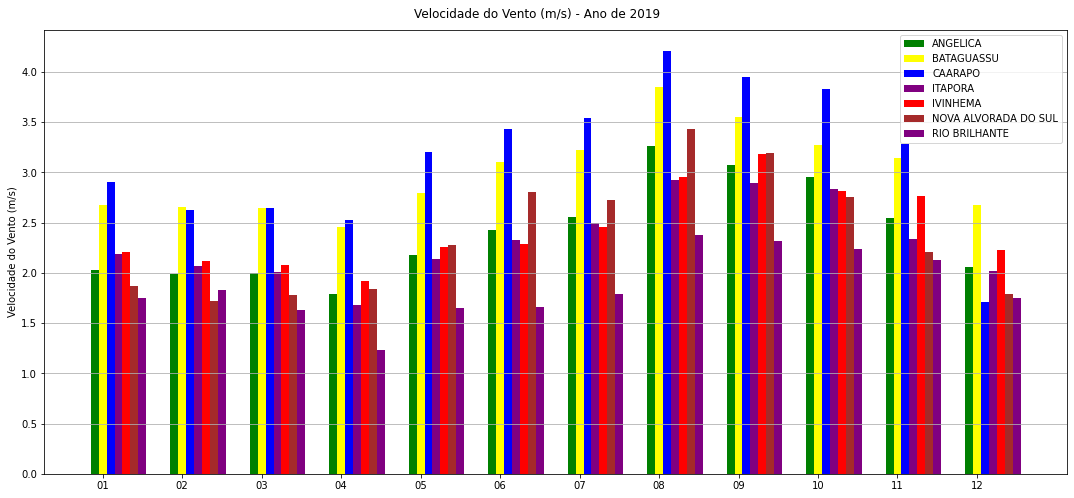

In [12]:
from bokeh.palettes import magma, Category20                  # paleta de cores
dfConsolidado = pd.read_csv("../datasets/consolidado.csv",";");  

dfConsolidado = dfConsolidado[dfConsolidado['ESTADO'] =='MS']
dfConsolidado = dfConsolidado[(dfConsolidado['LATITUDE'] <= -21.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['LATITUDE'] >= -23.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['LONGITUDE'] >= -55.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['CODIGO'] != 'A749')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'FATIMA DO SUL')] 

dfConsolidado = dfConsolidado.dropna( subset=['UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'])
dfConsolidado = dfConsolidado[ dfConsolidado['UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'].notna()]

dfConsolidado.loc[dfConsolidado['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].isnull(), 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = 0;
dfConsolidado.loc[dfConsolidado['VENTO, VELOCIDADE HORARIA (m/s)'].isnull(), 'VENTO, VELOCIDADE HORARIA (m/s)'] = 0;
dfConsolidado.loc[dfConsolidado['RADIACAO GLOBAL (KJ/m²)'].isnull(), 'RADIACAO GLOBAL (KJ/m²)'] = 0;
dfConsolidado.loc[dfConsolidado['VENTO, VELOCIDADE HORARIA (m/s)'].isnull(), 'VENTO, VELOCIDADE HORARIA (m/s)'] = 0;
dfConsolidado.loc[dfConsolidado['UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'].isnull(), 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'] = 100;
dfConsolidado.loc[dfConsolidado['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'].isnull(), 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'] = 50;

dfConsolidado['MES'] =  dfConsolidado['Data'].apply(lambda x: str(x)[5:7])
 
nd = pd.DataFrame(dfConsolidado, columns=['NOME','MES', 'VENTO, VELOCIDADE HORARIA (m/s)']).groupby(['NOME','MES'])['VENTO, VELOCIDADE HORARIA (m/s)'].mean().reset_index()


########################################################################
dfANGELICA =   nd[nd['NOME'] =='ANGELICA']
tmp1 = dfANGELICA['VENTO, VELOCIDADE HORARIA (m/s)']

dfMES = dfANGELICA['MES'] 

dfBATAGUASSU =  nd[nd['NOME'] =='BATAGUASSU']
tmp2 = dfBATAGUASSU['VENTO, VELOCIDADE HORARIA (m/s)']

dfCAARAPO =  nd[nd['NOME'] =='CAARAPO']
tmp3 = dfCAARAPO['VENTO, VELOCIDADE HORARIA (m/s)']

dfFATIMA =  nd[nd['NOME'] =='FATIMA DO SUL']
tmp4 = dfFATIMA['VENTO, VELOCIDADE HORARIA (m/s)']

dfITAPORA =  nd[nd['NOME'] =='ITAPORA']
tmp5 = dfITAPORA['VENTO, VELOCIDADE HORARIA (m/s)']

dfIVINHEMA =  nd[nd['NOME'] =='IVINHEMA']
tmp6 = dfIVINHEMA['VENTO, VELOCIDADE HORARIA (m/s)']

dfALVORADA =  nd[nd['NOME'] =='NOVA ALVORADA DO SUL']
tmp7 = dfALVORADA['VENTO, VELOCIDADE HORARIA (m/s)']

dfANDRADINA =  nd[nd['NOME'] =='NOVA ANDRADINA']
tmp8 = dfANDRADINA['VENTO, VELOCIDADE HORARIA (m/s)']

dfBRILHANTE =  nd[nd['NOME'] =='RIO BRILHANTE']
tmp9 = dfBRILHANTE['VENTO, VELOCIDADE HORARIA (m/s)']

dfPARDO =  nd[nd['NOME'] =='SANTA RITA DO PARDO']
tmp10 = dfPARDO['VENTO, VELOCIDADE HORARIA (m/s)']

dfDOURADOS =  nd[nd['NOME'] =='DOURADOS']
tmp11 = dfDOURADOS['VENTO, VELOCIDADE HORARIA (m/s)'] 

# exemplo - grafico
x = dfMES
y1 = tmp1
y2 = tmp2
y3 = tmp3
y4 = tmp4
y5 = tmp5
y6 = tmp6
y7 = tmp7
y8 = tmp8
y9 = tmp9
y10= tmp10
y11= tmp11


# matplotlib-exemplo-40
# Histogramas de cores
barWidth = 0.10

labels  = x 
fig, ax = plt.subplots(figsize=(15, 7))
width = 0.10 # largura da barra

r1 = np.arange(len(y1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]

ax.bar(r1, y1, width, color='green', label='ANGELICA',align='center')
ax.bar(r2, y2, width, color='yellow',   label='BATAGUASSU',align='center')
ax.bar(r3, y3, width, color='blue', label='CAARAPO',align='center')
ax.bar(r4, y5, width, color='purple', label='ITAPORA',align='center')
ax.bar(r5, y6, width, color='red', label='IVINHEMA',align='center')
ax.bar(r6, y7, width, color='brown', label='NOVA ALVORADA DO SUL',)
ax.bar(r7, y9, width, color='purple', label='RIO BRILHANTE',align='center')
#ax.bar(r8, y10, width, color='orange', label='SANTA RITA DO PARDO',align='center')

# labels, grids, titulos e gravar a figura
ax.set_xticks(ticks=[r + barWidth for r in range(len(y1))])
ax.set_xticklabels(labels)

ax.yaxis.grid(True)
ax.legend(loc='best')
ax.set_ylabel('Velocidade do Vento (m/s)')
fig.suptitle('Velocidade do Vento (m/s) - Ano de 2019')
fig.tight_layout(pad=1)
fig.savefig('barra.png', dpi=125)


Variáveis : TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)
            TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)     
            UMIDADE REL. MAX. NA HORA ANT. (AUT) (%) 
            UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)
            PRECIPITAÇÃO TOTAL, HORÁRIO (mm)

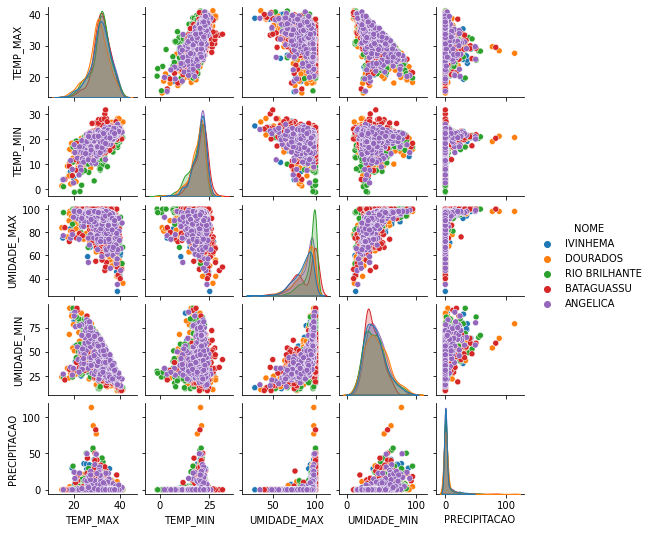

In [13]:
dfConsolidado = pd.read_csv("../datasets/consolidado.csv",";");  

dfConsolidado = dfConsolidado[dfConsolidado['ESTADO'] =='MS']
dfConsolidado = dfConsolidado[(dfConsolidado['LATITUDE'] <= -21.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['LATITUDE'] >= -23.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['LONGITUDE'] >= -55.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['CODIGO'] != 'A749')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'FATIMA DO SUL')] 
#########################################################################

dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'SANTA RITA DO PARDO')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'NOVA ANDRADINA')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'NOVA ALVORADA DO SUL')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'ITAPORA')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'CAARAPO')] 

#########################################################################

df = dfConsolidado
df.rename(columns = {'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)':'TEMP_MAX', 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)':'TEMP_MIN', 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)':'UMIDADE_MAX', 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)':'UMIDADE_MIN', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)':'PRECIPITACAO'}, inplace = True)

df =  df[['TEMP_MAX','TEMP_MIN','UMIDADE_MAX','UMIDADE_MIN','PRECIPITACAO','NOME']]

df=pd.DataFrame(df)

# Criando a matriz de caracteristicas
XD = df.iloc[:,:-1]
#print(XD.head())
# Criando o vetor objetivo (Outcome)
yd = df.iloc[:,-1]
#print(yd)

# visualizar por pares
#sns.set()
sns.pairplot(df, hue='NOME', height=1.5);


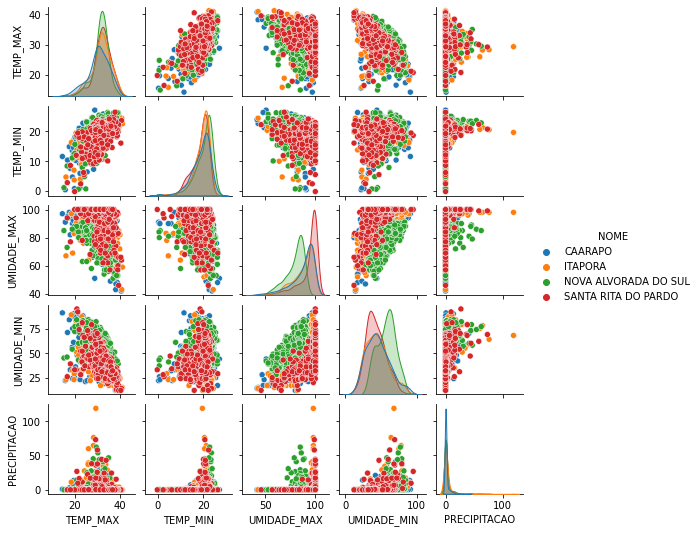

In [14]:
dfConsolidado = pd.read_csv("../datasets/consolidado.csv",";");  

dfConsolidado = dfConsolidado[dfConsolidado['ESTADO'] =='MS']
dfConsolidado = dfConsolidado[(dfConsolidado['LATITUDE'] <= -21.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['LATITUDE'] >= -23.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['LONGITUDE'] >= -55.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['CODIGO'] != 'A749')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'FATIMA DO SUL')] 

#########################################################################

dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'IVINHEMA')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'DOURADOS')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'RIO BRILHANTE')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'BATAGUASSU')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'ANGELICA')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'BRASILANDIA')]
#########################################################################

df = dfConsolidado
df.rename(columns = {'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)':'TEMP_MAX', 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)':'TEMP_MIN', 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)':'UMIDADE_MAX', 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)':'UMIDADE_MIN', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)':'PRECIPITACAO'}, inplace = True)

df =  df[['TEMP_MAX','TEMP_MIN','UMIDADE_MAX','UMIDADE_MIN','PRECIPITACAO','NOME']]

df=pd.DataFrame(df)

# Criando a matriz de caracteristicas
XD = df.iloc[:,:-1]
#print(XD.head())
# Criando o vetor objetivo (Outcome)
yd = df.iloc[:,-1]
#print(yd)

# visualizar por pares
#sns.set()
sns.pairplot(df, hue='NOME', height=1.5);


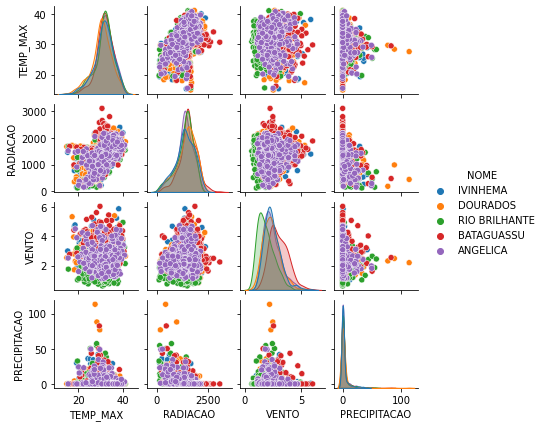

In [15]:
dfConsolidado = pd.read_csv("../datasets/consolidado.csv",";");  

dfConsolidado = dfConsolidado[dfConsolidado['ESTADO'] =='MS']
dfConsolidado = dfConsolidado[(dfConsolidado['LATITUDE'] <= -21.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['LATITUDE'] >= -23.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['LONGITUDE'] >= -55.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['CODIGO'] != 'A749')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'FATIMA DO SUL')] 
#########################################################################

dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'SANTA RITA DO PARDO')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'NOVA ANDRADINA')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'NOVA ALVORADA DO SUL')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'ITAPORA')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'CAARAPO')] 

#########################################################################

df = dfConsolidado
df.rename(columns = {'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)':'TEMP_MAX','RADIACAO GLOBAL (KJ/m²)':'RADIACAO', 'VENTO, VELOCIDADE HORARIA (m/s)':'VENTO', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)':'PRECIPITACAO'}, inplace = True)

df =  df[['TEMP_MAX','RADIACAO','VENTO','PRECIPITACAO','NOME']]

df=pd.DataFrame(df)

# Criando a matriz de caracteristicas
XD = df.iloc[:,:-1]
#print(XD.head())
# Criando o vetor objetivo (Outcome)
yd = df.iloc[:,-1]
#print(yd)

# visualizar por pares
#sns.set()
sns.pairplot(df, hue='NOME', height=1.5);


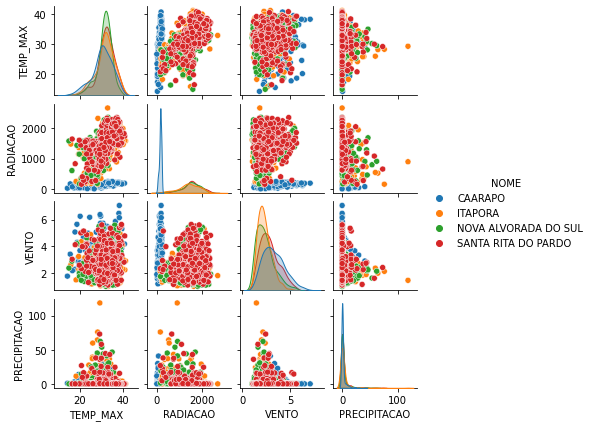

In [16]:
dfConsolidado = pd.read_csv("../datasets/consolidado.csv",";");  

dfConsolidado = dfConsolidado[dfConsolidado['ESTADO'] =='MS']
dfConsolidado = dfConsolidado[(dfConsolidado['LATITUDE'] <= -21.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['LATITUDE'] >= -23.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['LONGITUDE'] >= -55.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['CODIGO'] != 'A749')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'FATIMA DO SUL')] 
#########################################################################

dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'IVINHEMA')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'DOURADOS')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'RIO BRILHANTE')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'BATAGUASSU')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'ANGELICA')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'BRASILANDIA')]

#########################################################################

df = dfConsolidado
df.rename(columns = {'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)':'TEMP_MAX','RADIACAO GLOBAL (KJ/m²)':'RADIACAO', 'VENTO, VELOCIDADE HORARIA (m/s)':'VENTO', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)':'PRECIPITACAO'}, inplace = True)

df =  df[['TEMP_MAX','RADIACAO','VENTO','PRECIPITACAO','NOME']]

df=pd.DataFrame(df)

# Criando a matriz de caracteristicas
XD = df.iloc[:,:-1]
#print(XD.head())
# Criando o vetor objetivo (Outcome)
yd = df.iloc[:,-1]
#print(yd)

# visualizar por pares
#sns.set()
sns.pairplot(df, hue='NOME', height=1.5);

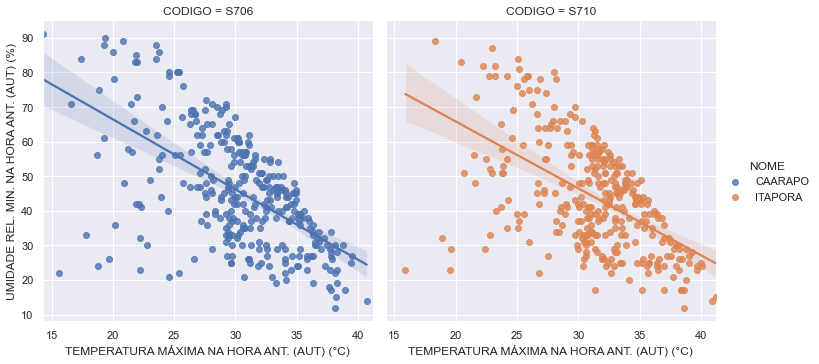

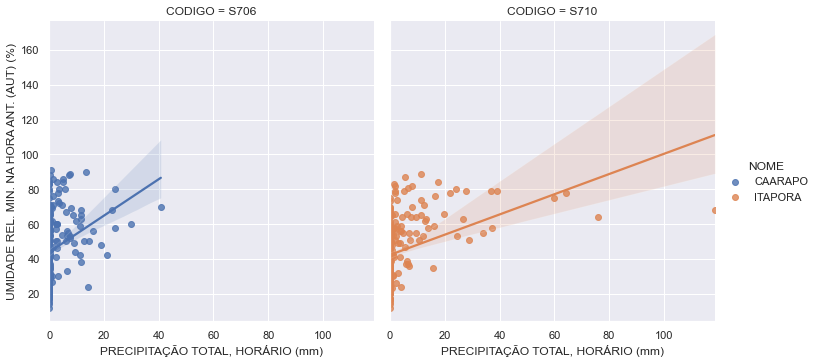

In [17]:
import seaborn as sns
#plt.style.use('seaborn-whitegrid')
sns.set_theme()   # tema
tips = sns.load_dataset("tips")

dfConsolidado = pd.read_csv("../datasets/consolidado.csv",";");  

dfConsolidado = dfConsolidado[dfConsolidado['ESTADO'] =='MS']
dfConsolidado = dfConsolidado[(dfConsolidado['LATITUDE'] <= -21.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['LATITUDE'] >= -23.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['LONGITUDE'] >= -55.00)] 
dfConsolidado = dfConsolidado[(dfConsolidado['CODIGO'] != 'A749')] 
dfConsolidado = dfConsolidado[(dfConsolidado['NOME'] != 'FATIMA DO SUL')] 
#########################################################################


 
dfDourados = dfConsolidado[dfConsolidado['NOME'].isin(['CAARAPO', 'ITAPORA'])]  # Retorna se for "sim" ou "nao"
 
sns.lmplot(data=dfDourados, x="TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)", y="UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)", col="CODIGO", hue="NOME");
sns.lmplot(data=dfDourados, x="PRECIPITAÇÃO TOTAL, HORÁRIO (mm)", y="UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)", col="CODIGO", hue="NOME");
